<h1><center><bold>Analysis of Religion's Impact on Countries</bold></center></h1>

Jeffrin Daniel

**Table of Contents:**

1. Introduction
2. Data Management/Munging
3. Exploratory Data Analysis
4. Hypothesis Testing
5. Insights and Conclusion

#1. Introduction

The objective of this tutorial is to examine the impact of religion on various parameters of a country, including GDP per capita, Healthy Life Expectancy, Social Support, Freedom to make life choices, Generosity, and Corruption Perception. These variables were actually used to calculate a "Happiness Score" for this dataset, however, this tutorial will primarily look at how impactful religion, specifically higher proportions of religious individuals in a country, can be one, or more, of these variables, some of which are perhaps seemingly unrelated (like GDP per capita and Healthy Life Expectancy). Nevertheless, this analysis will hopefully show some interesting and maybe unexpected trends between religion and the variables above. 

# 2. Data Management/Munging

For this portion of the tutorial, we will be collecting and cleaning (if needed) the data from websites and online databases.

For the data about countries across the world, I used a dataset found on [Kaggle](https://www.kaggle.com/datasets/mathurinache/world-happiness-report) with the variables (**GDP per capita, Healthy Life Expectancy, Social Support, Freedom to make life choices, Generosity, and Corruption Perception**). This dataset includes data for 153 countries and with a time frame from 2015-2022 (updated most recently in March, 2022). 

Here we are using the following tools...
1. pandas
2. numpy
3. matplotlib

In [130]:
import pandas as pd
import numpy as np
from pandas._libs.tslibs import dtypes
import matplotlib.pyplot as plt

## Happiness Data

In [68]:
df_2015 = pd.read_csv("data/2015.csv")
df_2016 = pd.read_csv("data/2016.csv")
df_2017 = pd.read_csv("data/2017.csv")
df_2018 = pd.read_csv("data/2018.csv")
df_2019 = pd.read_csv("data/2019.csv")
df_2020 = pd.read_csv("data/2020.csv")
df_2021 = pd.read_csv("data/2021.csv")
df_2022 = pd.read_csv("data/2022.csv")

We have data from the years 2015-2022, with the most recent update of 2022 data being in March. Down the stretch of this tutorial, it will likely be a lot easier to examine all the data within one Pandas Dataframe, so I will do some cleaning to make these dataframes more uniform, and then add a column which indicates the year for each row of data (so identifying the year on the single Dataframe is easier). 

However, before blindly concatenating these DataFrames, we must ensure that the columns are the same throughout the yearly DataFrames. We can check this by doing the following...

In [69]:
print("Columns of 2015 DataFrame:\n" + str(list(df_2015)))
print("\nColumns of 2016 DataFrame:\n" + str(list(df_2016)))
print("\nColumns of 2017 DataFrame:\n" + str(list(df_2017)))
print("\nColumns of 2018 DataFrame:\n" + str(list(df_2018)))
print("\nColumns of 2019 DataFrame:\n" + str(list(df_2019)))
print("\nColumns of 2020 DataFrame:\n" + str(list(df_2020)))
print("\nColumns of 2021 DataFrame:\n" + str(list(df_2021)))
print("\nColumns of 2022 DataFrame:\n" + str(list(df_2022)))

Columns of 2015 DataFrame:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

Columns of 2016 DataFrame:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

Columns of 2017 DataFrame:
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

Columns of 2018 DataFrame:
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corrupti

Although this is a crude and somewhat inefficient method of checking column names, it still works. We can easily see that there are plenty of inconsistensies, as in there are some DataFrames with additional columns (like confidence intervals for Happiness Score) that other DataFrames do not contain. Additionally, the DataFrames for 2020 and 2021 both do not include a Happiness Rank, only a score (again with the name being "Ladder score" rather than "Happiness score"). Thus, let us first delete columns that might not provide relevant information. 

In [70]:
# These are the columns which we want for the large dataset
cols = ['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita (Economy)', 'Social Support', 'Healthy Life Expectancy',
        'Freedom to make life choices', 'Perceptions of Corruption', 'Generosity', 'Year']

# First let's add a column for Year
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
dfs = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

for i in range(0, 8):
  dfs[i]['Year'] = years[i]

# 2015 
df_2015.drop(['Region', 'Standard Error', 'Dystopia Residual'], axis=1, inplace=True)

# 2016
df_2016.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis=1, inplace=True)

# 2017
df_2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1, inplace=True)

# 2020
df_2020.drop(['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Dystopia + residual'], axis=1, inplace=True)
df_2020 = df_2020.drop([col for col in df_2020.columns if 'Explained by' in col], axis=1)

# 2021
df_2021.drop(['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Dystopia + residual'], axis=1, inplace=True)
df_2021 = df_2021.drop([col for col in df_2021.columns if 'Explained by' in col], axis=1)

# 2022
df_2022.drop(['Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual'], axis=1, inplace=True)

The procedure that I took here was first defining what my desired columns of the final DataFrame would be and storing it in a list. Then I added a column for years, so that when we have our final DataFrame, we can still reference which year this row of data is referring to. Finally, I dropped the columns that I did not plan on using from each of the current DataFrames. As we can see, 2018 and 2019 do not need additional columns removed, just for the columns to be reordered and finally renamed.

In [71]:
print("Columns of 2015 DataFrame:\n" + str(list(df_2015)))
print("\nColumns of 2016 DataFrame:\n" + str(list(df_2016)))
print("\nColumns of 2017 DataFrame:\n" + str(list(df_2017)))
print("\nColumns of 2018 DataFrame:\n" + str(list(df_2018)))
print("\nColumns of 2019 DataFrame:\n" + str(list(df_2019)))
print("\nColumns of 2020 DataFrame:\n" + str(list(df_2020)))
print("\nColumns of 2021 DataFrame:\n" + str(list(df_2021)))
print("\nColumns of 2022 DataFrame:\n" + str(list(df_2022)))

Columns of 2015 DataFrame:
['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']

Columns of 2016 DataFrame:
['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']

Columns of 2017 DataFrame:
['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Year']

Columns of 2018 DataFrame:
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']

Columns of 2019 DataFrame:
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to mak

That looks a lot better, right? We still have a couple things to fix, however, like the order of the columns and the fact that certain DataFrames are missing a Happiness Rank, although they do have an associated Happiness score. 

In [72]:
# 2020 and 2021 are missing a column for Happiness rank, so let us fix that
df_2020['Rank'] = df_2020['Ladder score'].rank(ascending=False).astype(int)
df_2021['Rank'] = df_2021['Ladder score'].rank(ascending=False).astype(int)

# Re-order column names with 'Country', 'Rank', 'Score', etc
df_2017 = df_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 
                   'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Year']]

df_2018 = df_2018[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 
                   'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity', 'Year']]
                  
df_2019 = df_2019[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 
                   'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity', 'Year']]

df_2020 = df_2020[['Country name', 'Rank', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
                   'Freedom to make life choices', 'Perceptions of corruption', 'Generosity', 'Year']]

df_2021 = df_2021[['Country name', 'Rank', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
                   'Freedom to make life choices', 'Perceptions of corruption', 'Generosity', 'Year']]

df_2022 = df_2022[['Country', 'RANK', 'Happiness score', 'Explained by: GDP per capita', 'Explained by: Social support', 
                   'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
                   'Explained by: Perceptions of corruption', 'Explained by: Generosity', 'Year']]

print("Columns of 2015 DataFrame:\n" + str(list(df_2015)))
print("\nColumns of 2016 DataFrame:\n" + str(list(df_2016)))
print("\nColumns of 2017 DataFrame:\n" + str(list(df_2017)))
print("\nColumns of 2018 DataFrame:\n" + str(list(df_2018)))
print("\nColumns of 2019 DataFrame:\n" + str(list(df_2019)))
print("\nColumns of 2020 DataFrame:\n" + str(list(df_2020)))
print("\nColumns of 2021 DataFrame:\n" + str(list(df_2021)))
print("\nColumns of 2022 DataFrame:\n" + str(list(df_2022)))

Columns of 2015 DataFrame:
['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']

Columns of 2016 DataFrame:
['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']

Columns of 2017 DataFrame:
['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Year']

Columns of 2018 DataFrame:
['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity', 'Year']

Columns of 2019 DataFrame:
['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to mak

This looks a lot more uniform, but we have one final step of renaming the columns.

In [73]:
updated_dfs = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

for i in updated_dfs:
  i.set_axis(cols, axis=1, inplace=True)
  
print("Columns of 2015 DataFrame:\n" + str(list(df_2015)))
print("\nColumns of 2016 DataFrame:\n" + str(list(df_2016)))
print("\nColumns of 2017 DataFrame:\n" + str(list(df_2017)))
print("\nColumns of 2018 DataFrame:\n" + str(list(df_2018)))
print("\nColumns of 2019 DataFrame:\n" + str(list(df_2019)))
print("\nColumns of 2020 DataFrame:\n" + str(list(df_2020)))
print("\nColumns of 2021 DataFrame:\n" + str(list(df_2021)))
print("\nColumns of 2022 DataFrame:\n" + str(list(df_2022)))

Columns of 2015 DataFrame:
['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita (Economy)', 'Social Support', 'Healthy Life Expectancy', 'Freedom to make life choices', 'Perceptions of Corruption', 'Generosity', 'Year']

Columns of 2016 DataFrame:
['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita (Economy)', 'Social Support', 'Healthy Life Expectancy', 'Freedom to make life choices', 'Perceptions of Corruption', 'Generosity', 'Year']

Columns of 2017 DataFrame:
['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita (Economy)', 'Social Support', 'Healthy Life Expectancy', 'Freedom to make life choices', 'Perceptions of Corruption', 'Generosity', 'Year']

Columns of 2018 DataFrame:
['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita (Economy)', 'Social Support', 'Healthy Life Expectancy', 'Freedom to make life choices', 'Perceptions of Corruption', 'Generosity', 'Year']

Columns of 2019 DataFrame:
['Country', 'Happiness Rank', 'Happiness 

Now that the number of columns, types of data in each column, and their respective names are all matched, we can finally concatenate these DataFrames.

In [74]:
happiness_df = pd.concat(updated_dfs)
happiness_df

,Country,Happiness Rank,Happiness Score,GDP per Capita (Economy),Social Support,Healthy Life Expectancy,Freedom to make life choices,Perceptions of Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
142,Rwanda*,143,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
143,Zimbabwe,144,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
144,Lebanon,145,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022
145,Afghanistan,146,"2,404","0,758","0,000","0,289","0,000","0,005","0,089",2022


There does seem to be some issues with the 2022 data, i.e. there are commas instead of decimal points and the last row of 2022 just read some junk in as input. If we are working with other pieces of data from 2022, this can very easily be modified later.

## Religion Data

Next, we will also look at data regarding religion from each country. 
For more, this information can be downloaded from the following website: https://data.un.org/Data.aspx?d=POP&f=tableCode%3A28

This data is from the United Nations Statistic Division, and there's even a column named "Reliability" which indicates how reliable the figure is. 

In [76]:
rel_df = pd.read_csv("UNdata.csv")
rel_df

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Albania,2011,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2013.0,2800138.0,NaN
1,Albania,2011,Total,Both Sexes,Atheist,Census - de jure - complete tabulation,"Final figure, complete",2013.0,69995.0,NaN
2,Albania,2011,Total,Both Sexes,Catholic,Census - de jure - complete tabulation,"Final figure, complete",2013.0,280921.0,NaN
3,Albania,2011,Total,Both Sexes,Evangelical,Census - de jure - complete tabulation,"Final figure, complete",2013.0,3797.0,NaN
4,Albania,2011,Total,Both Sexes,Muslim,Census - de jure - complete tabulation,"Final figure, complete",2013.0,1587608.0,NaN
...,...,...,...,...,...,...,...,...,...,...
22179,85,Data of mini-census taken in 2017.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22180,86,Data refer to resident population.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22181,87,Excluding population enumerated in hotels.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22182,88,"Other includes Orthodox, Bahai, Other Christia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The goal of this tutorial is not to examine census information or to pick and choose certain religions to analyze. Rather, I will make an attempt to generalize "religious" versus "non-religious", so the only metric being looked at it the proportion of "religious" individuals there are in a country, regardless of however many religions might be practiced in that country. Additionally, we must also make a note that, according to the website where this data was taken from, there is data on only 113 countries or areas, versus the 153 countries included in Kaggle dataset.

In [82]:
rel_df.tail(90)
rel_df.drop(rel_df.tail(90).index, inplace=True)
rel_df

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Albania,2011,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2013.0,2800138.0,NaN
1,Albania,2011,Total,Both Sexes,Atheist,Census - de jure - complete tabulation,"Final figure, complete",2013.0,69995.0,NaN
2,Albania,2011,Total,Both Sexes,Catholic,Census - de jure - complete tabulation,"Final figure, complete",2013.0,280921.0,NaN
3,Albania,2011,Total,Both Sexes,Evangelical,Census - de jure - complete tabulation,"Final figure, complete",2013.0,3797.0,NaN
4,Albania,2011,Total,Both Sexes,Muslim,Census - de jure - complete tabulation,"Final figure, complete",2013.0,1587608.0,NaN
...,...,...,...,...,...,...,...,...,...,...
22089,Zambia,2010,Rural,Female,Hindu,Census - de facto - complete tabulation,"Final figure, complete",2015.0,189.0,NaN
22090,Zambia,2010,Rural,Female,Muslim,Census - de facto - complete tabulation,"Final figure, complete",2015.0,12038.0,NaN
22091,Zambia,2010,Rural,Female,Protestant,Census - de facto - complete tabulation,"Final figure, complete",2015.0,2915043.0,NaN
22092,Zambia,2010,Rural,Female,Other,Census - de facto - complete tabulation,"Final figure, complete",2015.0,72222.0,NaN


In [122]:
df = rel_df[['Country or Area', 'Year', 'Religion', 'Value']]
df.Religion.unique

<bound method Series.unique of 0              Total
1            Atheist
2           Catholic
3        Evangelical
4             Muslim
            ...     
22089          Hindu
22090         Muslim
22091     Protestant
22092          Other
22093           None
Name: Religion, Length: 22094, dtype: object>

I chose not to display every single classification that people from across the world can identify with since there are quite a few. For the purposes of this tutorial, I will be looking at **'Total'**, which represents the total population of a country at that year, and the classifications that clearly tries to represent an individual who is not religious. For this, I will be only keeping classifications such as **'Atheist', 'No Religion'**, and **'None'**. There are more ambiguous classifications like **'No Affiliation', 'Non-denominational',** and **'Not Specified'**, which are not as clear as the former classifications.

In [127]:
countries = df['Country or Area'].unique()

df = df.drop_duplicates(subset=['Country or Area', 'Year'], keep='first')


def label(row):
  total = 0
  if row['Religion'] == 'Atheist':
    total += row['Value']
  if row['Religion'] == 'No Religion':
    total += row['Value']
  if row['Religion'] == 'None':
    total += row['Value']
  return total

df['Total'] = np.log(df['Value'])
df

,Country or Area,Year,Religion,Value,Total
0,Albania,2011,Total,2800138.0,14.845179
12,Anguilla,2001,Total,11430.0,9.343997
69,Antigua and Barbuda,2001,Total,76886.0,11.250079
135,Armenia,2011,Armenian Apostolic,2796519.0,14.843886
234,Aruba,2010,Total,101484.0,11.527656
...,...,...,...,...,...
21716,United Kingdom of Great Britain and Northern I...,2011,Total,63182178.0,17.961533
21806,United Kingdom of Great Britain and Northern I...,2001,Total,58789194.0,17.889469
21896,Vanuatu,2009,Total,234023.0,12.363175
21932,Viet Nam,1999,Total,76323173.0,18.150487


# 3. Exploratory Data Analysis

We now want to do some analysis on this data. I was unable to get some features for calculating religion to work, so this was my alternative.

ValueError: ignored

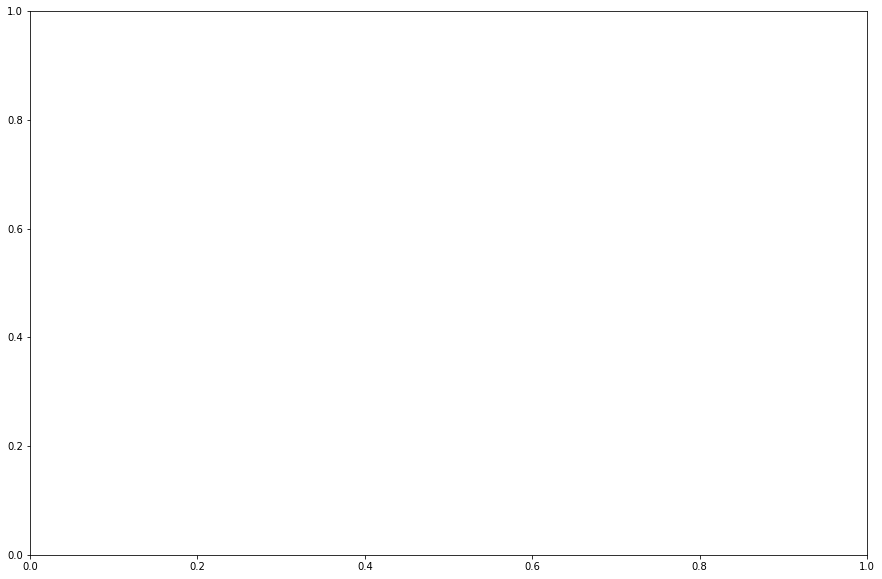

In [131]:
plt.figure(figsize=(15,10))
plt.scatter(df['Total'], happiness_df['Happiness Score'])
plt.show()

# 4. Hypothesis Testing

Null Hypothesis:
Religion has no relationship with parameters such as GDP per capita, Healthy Life Expectancy, Social Support, Freedom to make life choices, Generosity, and Corruption Perception.

# 5. Insights and Conclusion

From our exploratory data analysis, we could tell that there does seem to be **some** correlation between religion and _____. This tutorial is by no means advocating religion to be mandated by the government or saying that one religion might be more impactful than another.